# BLG210E - Engineering Mathematics

In this notebook, we will apply our knowlegde about linear algebra on several real-world problems: data compression and dimensionality reduction. All the codes in this notebook are written with the Python programming language.

As a first step, import the necessary libraries.

In [1]:
import numpy as np  #for numerical operations
import cv2          #for image processing
import matplotlib.pyplot as plt #for visualization
import sys         #for system operations
from sklearn import datasets    #for loading dataset
from sklearn.decomposition import PCA #for PCA

### 1. Image Compression with Wavelet Transform

Load the image and transform it to grayscale.

In [2]:
file_name = 'bee.png'
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

Get the image dimension and convert the image to double. This will create a matrix representing the image.

For this example, we will use a 8x8 wavelet. This is why the dimensions of the image should be a multiple of 8.

In [3]:
height, width = image.shape
print(height, width)
height = (height // 8) * 8
width = (width // 8) * 8
image = image[:height, :width]

# Convert image to double
G = image.astype(np.float64)

print('Image shape:', G.shape)

914 1308
Image shape: (912, 1304)


Define the wavelet and normalize it.

In [4]:
w = np.array([
    [1, 1, 1, 0, 1, 0, 0, 0],
    [1, 1, 1, 0, -1, 0, 0, 0],
    [1, 1, -1, 0, 0, 1, 0, 0],
    [1, 1, -1, 0, 0, -1, 0, 0],
    [1, -1, 0, 1, 0, 0, 1, 0],
    [1, -1, 0, 1, 0, 0, -1, 0],
    [1, -1, 0, -1, 0, 0, 0, 1],
    [1, -1, 0, -1, 0, 0, 0, -1]
])

# Normalize the basis
W = w / np.sqrt(np.diag(w.T @ w))

Define the threshold and create an empty variable for the compressed image. 

In [5]:
Threshold = 1e4
G_compressed = np.zeros_like(G)

Compress the image. The image and the wavelet has the following mathematical relationship. 

$ W \times G_{compressed} = G$

Here, $W$ is the wavelet (matrix), $G_{compressed}$ is the compressed image (matrix), and $G$ is the original image (matrix). Our aim is to find $G_{compressed}$.

For this, we first solve this equation and compare the values on the diagonal ($G_{block} \times G_{block}^T$) with a threshold value. If this value is smaller than the predefined threshold, we discard those pixels. This elimination creates the compression.

Compressed image shape: (912, 1304)


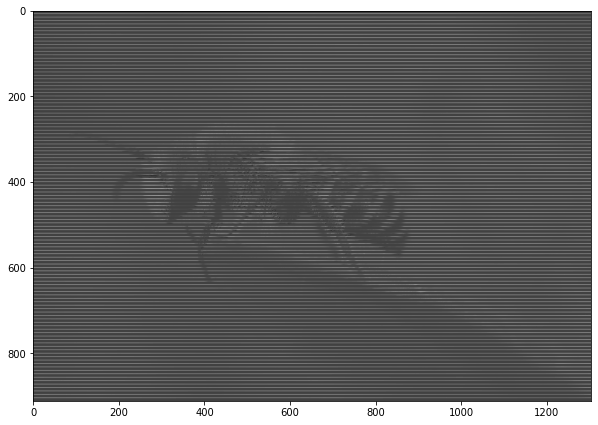

In [6]:
for i in range(0, height, 8):
    for j in range(0, width, 8):
        G_block = np.linalg.solve(W, G[i:i+8, j:j+8])
        idx = np.diag(G_block @ G_block.T) < Threshold
        #print(idx)
        G_block[idx, :] = 0
        #print(G_block)
        G_compressed[i:i+8, j:j+8] = G_block

print('Compressed image shape:', G_compressed.shape)
plt.figure(figsize=(10, 8))
plt.imshow(G_compressed, cmap='gray')

Here, you may ask the following question: how come $G_{compressed}$ creates a compression while the dimensions of it is the same with the origina image $G$?

Notice that $G_{compressed}$ has so many dark pixels, which means the  values on the matrix are 0. This means that this matrix is sparse. There are varios ways to store sparse matrices with a vast storage gain. So, if you use method, you can gain so much disk space.

For decompressing the image, we have to use the orig,inal wavelet matrix along with the compressed image. The following equation creates the uncompressed image:

$G_{decompressed} = W \times G_{compressed}$

In [7]:
G_recovered = np.zeros_like(G)

for i in range(0, height, 8):
    for j in range(0, width, 8):
        G_recovered[i:i+8, j:j+8] = W @ G_compressed[i:i+8, j:j+8]

G_recovered = np.clip(G_recovered, 0, 255).astype(np.uint8)


Show the decompressed image.

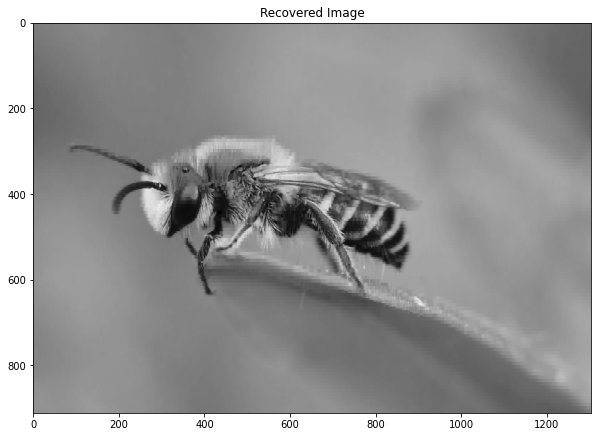

In [8]:
plt.figure(figsize=(10, 8))
plt.imshow(G_recovered, cmap='gray')
plt.title('Recovered Image')
plt.show()

As you see, the decompressed image does not have the same resolution with the original image. This is why this kind of compression is called "Lossy Compression". For example, JPEG2000 format uses wavelets.

-----

### 2. Principal Component Analysis (PCA)

Load the Iris data. This is a mock dataset which is widely used for machine learning tutorials. The dataset has 150 flowers (rows) and 4 features (columns). Each record has a class label, indicating the flower type.

In [9]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
print("The dataset contains %d samples and %d features." % (X.shape[0], X.shape[1]))

The dataset contains 150 samples and 4 features.


Plotting the entire data will not be possible since it has 4 columns and we are living in 3D space. An alternative approach is plotting the data by grouping as 3D subsets.

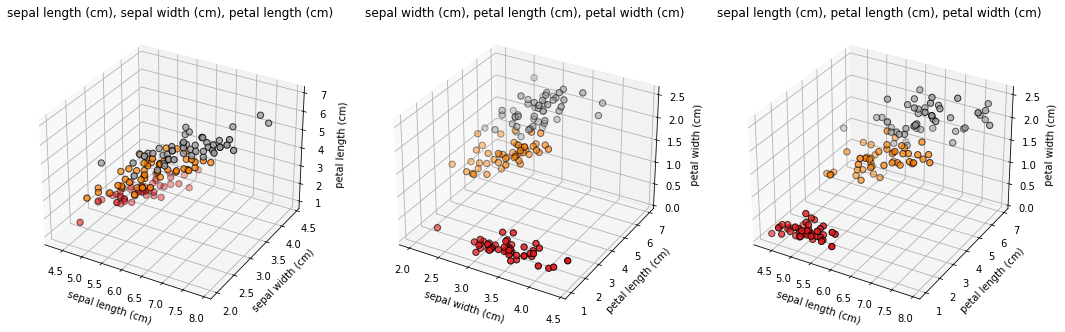

In [10]:
fig = plt.figure(figsize=(18, 6))

combinations = [(0, 1, 2), (1, 2, 3), (0, 2, 3)]

for i, (f1, f2, f3) in enumerate(combinations):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    ax.set_title(f'{iris.feature_names[f1]}, {iris.feature_names[f2]}, {iris.feature_names[f3]}')
    ax.scatter(X[:, f1], X[:, f2], X[:, f3], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
    ax.set_xlabel(iris.feature_names[f1])
    ax.set_ylabel(iris.feature_names[f2])
    ax.set_zlabel(iris.feature_names[f3])
plt.show()


Apply PCA to the entire data and find 2 principal components.

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


In [12]:
X_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

Plot the reduced data.

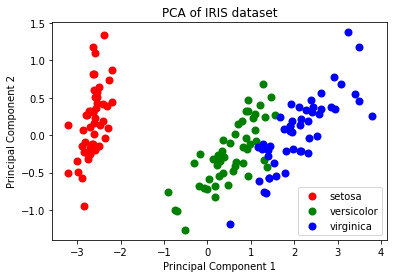

<Figure size 720x576 with 0 Axes>

In [13]:
for color, i, target_name in zip(["red", "green", "blue"], [0, 1, 2], iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, lw=2, label=target_name)
plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.figure(figsize=(10, 8))
plt.show()

Some facts about the PCA:
- With this reduced version of the original data, we can do visualizations, apply machine learning algorithms, or compare different datasets.
- Each principal component here is orthogonal to each other. With this operation, we are transforming to a new orthonormal basis.
- Similar to the compression operations we have done, with PCA, we are representing the data with a condensed latent space. In other words, we are creating new features which carry the maximum amount of information.
- These new features can be linear combinations of the original features.